## Objective:
Build a predictive model that can estimate the likelihood of a client subscribing to the term deposit based on a set of 20 input features.

## About the dataset

The data is related to direct marketing campaign direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41199) and 20 inputs, ordered by date (from May 2008 to November 2010)

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


---



related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



---



other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



---


social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

EURIBOR 3 Month Rate is a daily financial indicator that represents the interest rate at which Eurozone banks borrow funds from each other for a period of three months. EURIBOR stands for "Euro Interbank Offered Rate" and is calculated and published daily by the European Money Markets Institute (EMMI).

20 - nr.employed: number of employees - quarterly indicator (numeric)


---


Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')





### Importing Necessary Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
#Importing the dataset
df=pd.read_csv(r"E:\Bank Term deposit subscription\bank-additional-full_final (1).csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analysis

In [5]:
print(f'This dataset has {df.shape[1]} features and {df.shape[0]} instances.')

This dataset has 21 features and 41199 instances.


In [6]:
df.info() #Understanding the data types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [7]:
df.isna().sum().sum()

76

In [8]:
def null_and_duplicates(df):
  #Check for Null values
  print("Null Values")
  print('-'*60)
  if df.isna().sum().sum()==0:
    print(f'This dataset has no Null values')
  else:
    print(f'{df.isna().sum()}')
    print('-'*60)
    print(f'Count of Null Values:{df.isna().sum().sum()}')
    print('*'*60)
  ##Check for Duplicate Values
  print("Duplicate Values")
  print('-'*60)
  print()
  if df.duplicated().sum()==0:
    print(f'This dataset has no Duplicate values')
    print('-'*60)
  else:
    print(f'Count of Duplicate Values:{df.duplicated().sum()}')
    print('-'*60)

null_and_duplicates(df)

Null Values
------------------------------------------------------------


age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64
------------------------------------------------------------
Count of Null Values:76
************************************************************
Duplicate Values
------------------------------------------------------------

Count of Duplicate Values:15
------------------------------------------------------------


In [9]:
#Dropping the duplicates and null values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
#Stats Summary ofthe data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


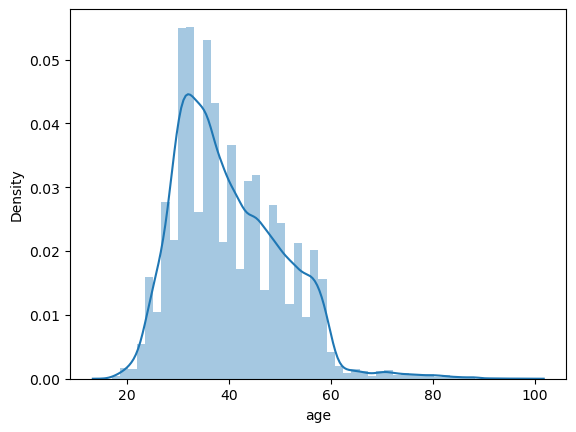

--------------------------------------------------------------------------------


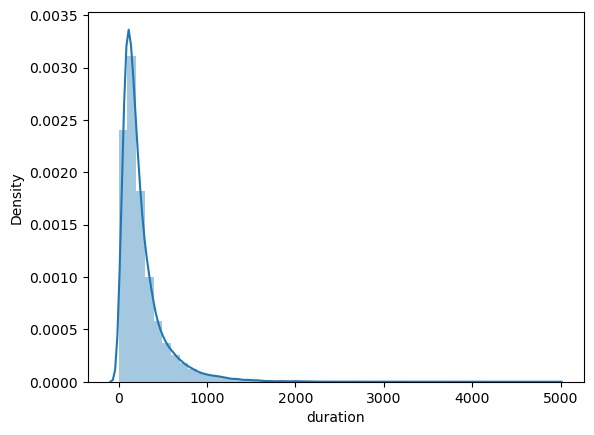

--------------------------------------------------------------------------------


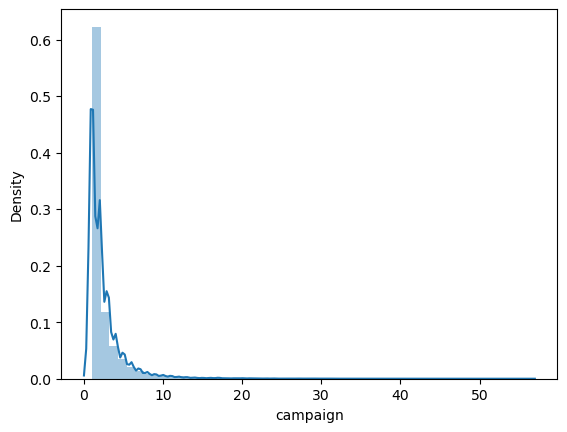

--------------------------------------------------------------------------------


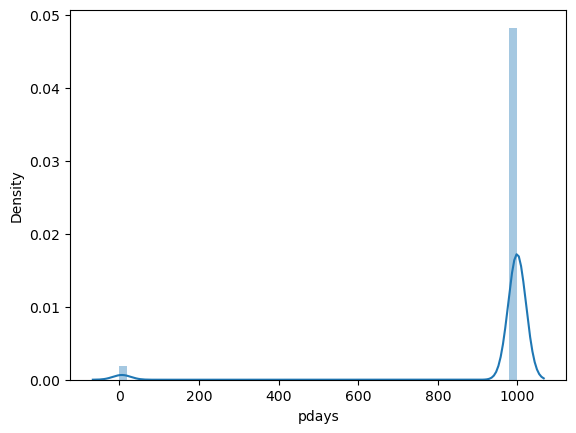

--------------------------------------------------------------------------------


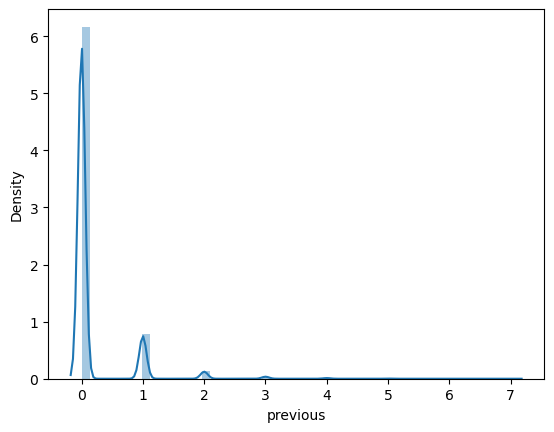

--------------------------------------------------------------------------------


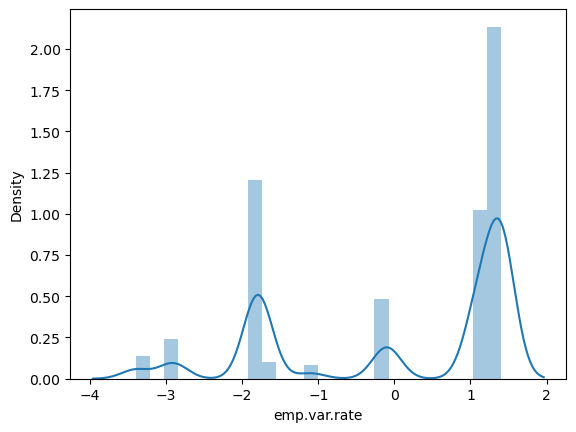

--------------------------------------------------------------------------------


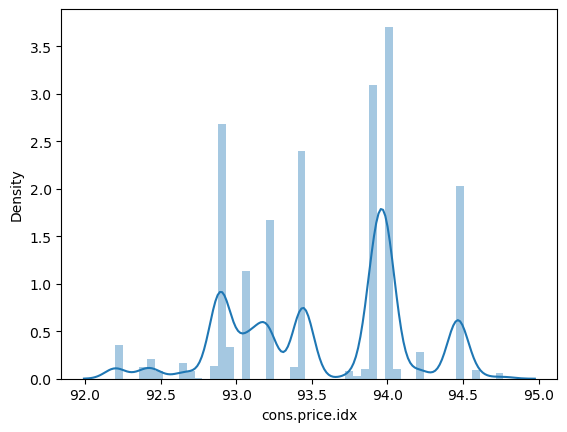

--------------------------------------------------------------------------------


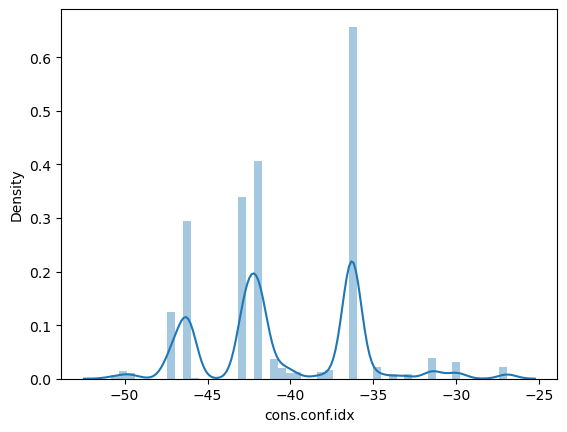

--------------------------------------------------------------------------------


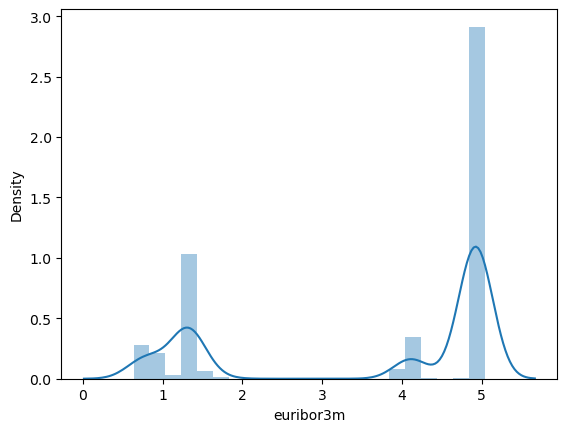

--------------------------------------------------------------------------------


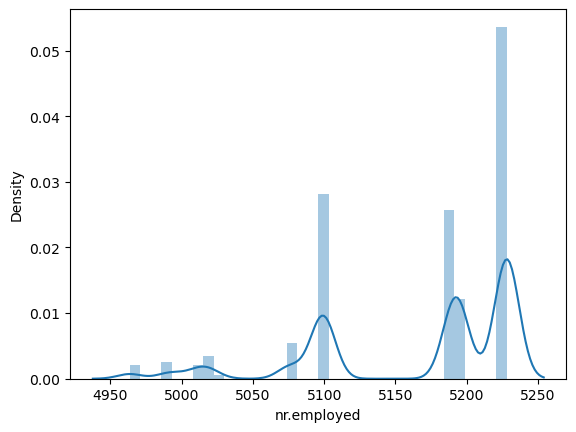

--------------------------------------------------------------------------------


In [11]:
import warnings
warnings.filterwarnings('ignore')

#Distribution of the data
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.distplot(df[i])
        plt.show()
        print('-'*80)

In [12]:
def object_columns(df):
  return df.select_dtypes(include='object')

cat_var=object_columns(df)
cat_var.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1719
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
--------------------------------------------------------------------------------
job
admin.           25.302960
blue-collar      22.471283
technician       16.365932
services          9.634019
management        7.101052
retired           4.174661
entrepreneur      3.535955
self-employed     3.450956
housemaid         2.574253
unemployed        2.462540
student           2.124973
unknown           0.801418
Name: proportion, dtype: float64
--------------------------------------------------------------------------------


Axes(0.125,0.11;0.775x0.77)


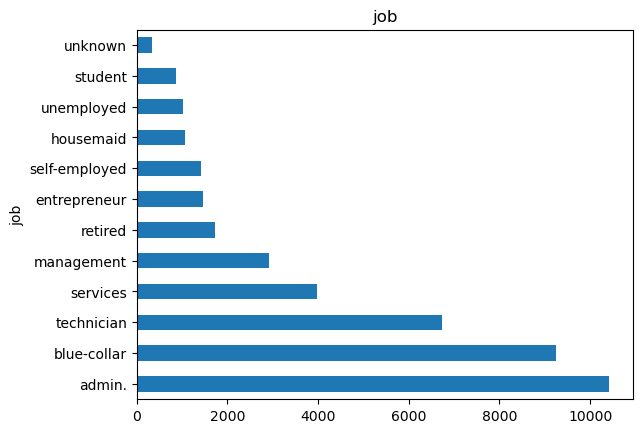


****************************************************************************************************
marital
married     24922
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
--------------------------------------------------------------------------------
marital
married     60.524079
single      28.083639
divorced    11.197999
unknown      0.194283
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


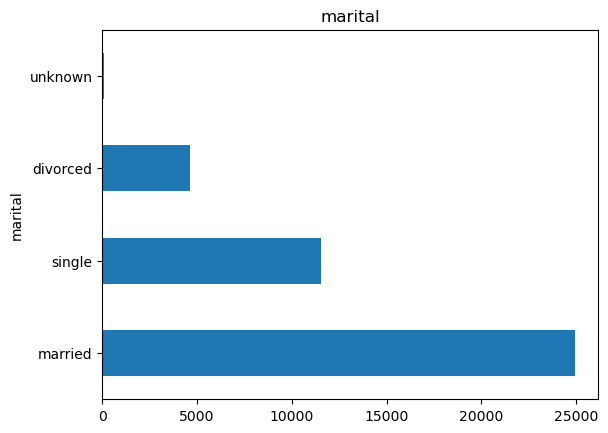


****************************************************************************************************
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5241
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
--------------------------------------------------------------------------------
education
university.degree      29.540763
high.school            23.100274
basic.9y               14.680526
professional.course    12.727979
basic.4y               10.141584
basic.6y                5.563786
unknown                 4.201375
illiterate              0.043714
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


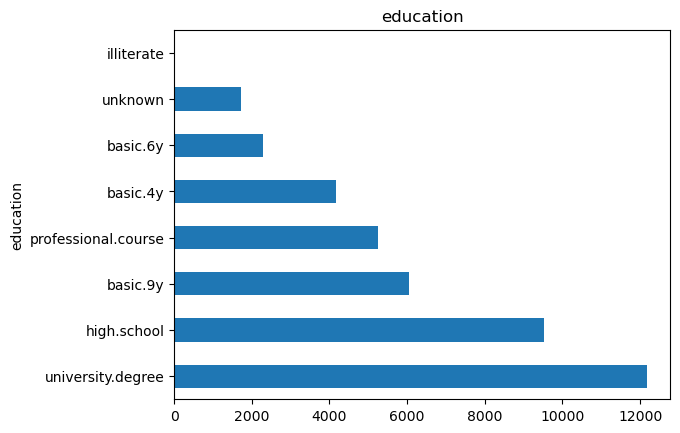


****************************************************************************************************
default
no         32578
unknown     8596
yes            3
Name: count, dtype: int64
--------------------------------------------------------------------------------
default
no         79.116983
unknown    20.875732
yes         0.007286
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


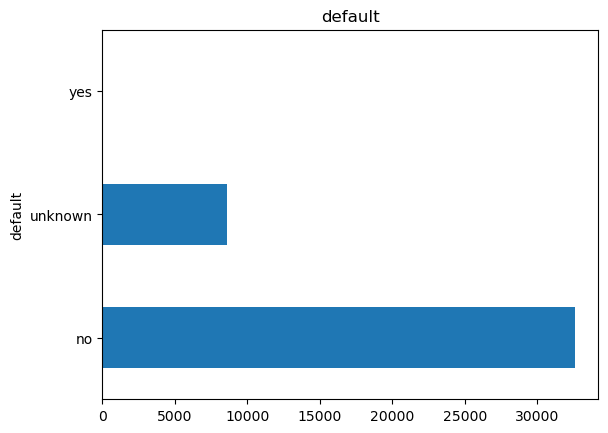


****************************************************************************************************
housing
yes        21572
no         18615
unknown      990
Name: count, dtype: int64
--------------------------------------------------------------------------------
housing
yes        52.388469
no         45.207276
unknown     2.404255
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


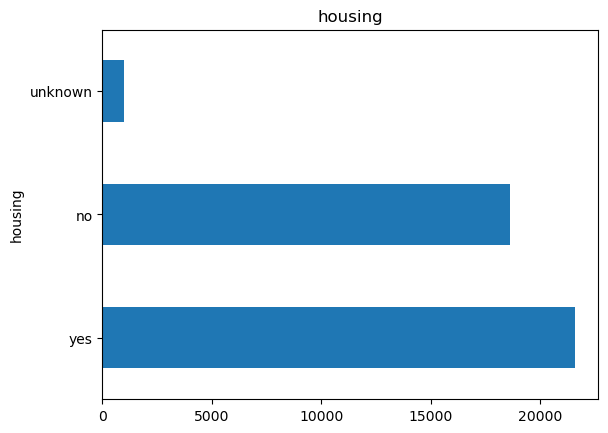


****************************************************************************************************
loan
no         33939
yes         6248
unknown      990
Name: count, dtype: int64
--------------------------------------------------------------------------------
loan
no         82.422226
yes        15.173519
unknown     2.404255
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


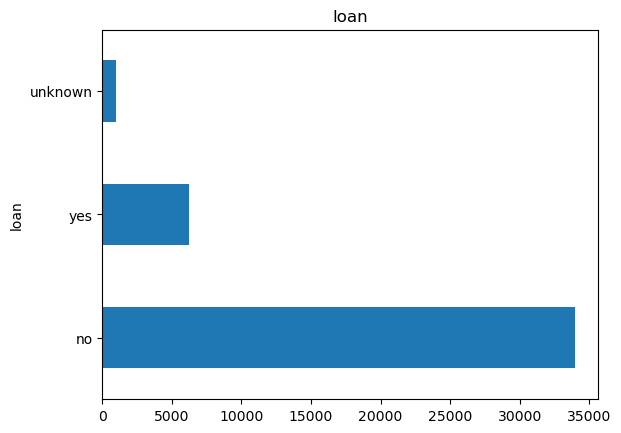


****************************************************************************************************
contact
cellular     26136
telephone    15041
Name: count, dtype: int64
--------------------------------------------------------------------------------
contact
cellular     63.472327
telephone    36.527673
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


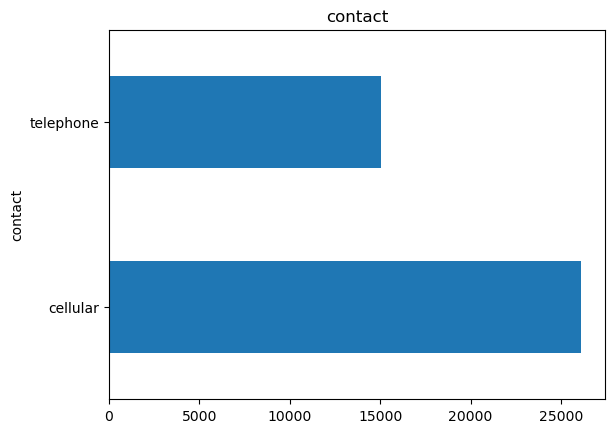


****************************************************************************************************
month
may    13767
jul     7169
aug     6176
jun     5318
nov     4101
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64
--------------------------------------------------------------------------------
month
may    33.433713
jul    17.410205
aug    14.998664
jun    12.914977
nov     9.959443
apr     6.389489
oct     1.741263
sep     1.384268
mar     1.325983
dec     0.441994
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


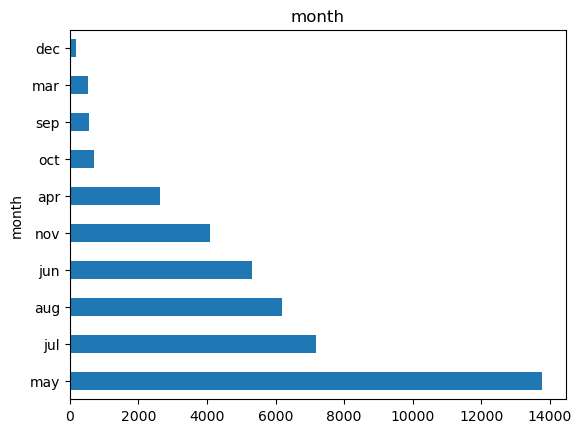


****************************************************************************************************
day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7827
Name: count, dtype: int64
--------------------------------------------------------------------------------
day_of_week
thu    20.929159
mon    20.671734
wed    19.753746
tue    19.637176
fri    19.008184
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


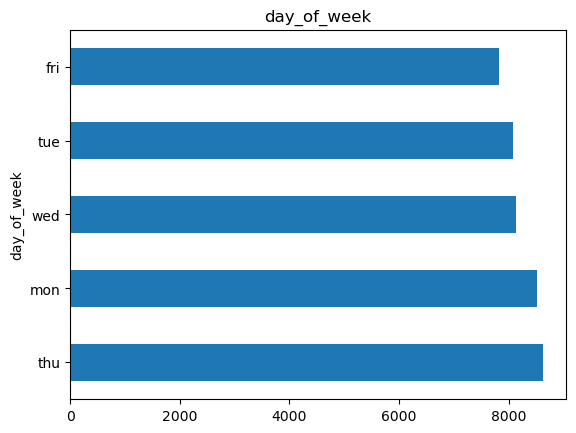


****************************************************************************************************
poutcome
nonexistent    35551
failure         4253
success         1373
Name: count, dtype: int64
--------------------------------------------------------------------------------
poutcome
nonexistent    86.337033
failure        10.328581
success         3.334386
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


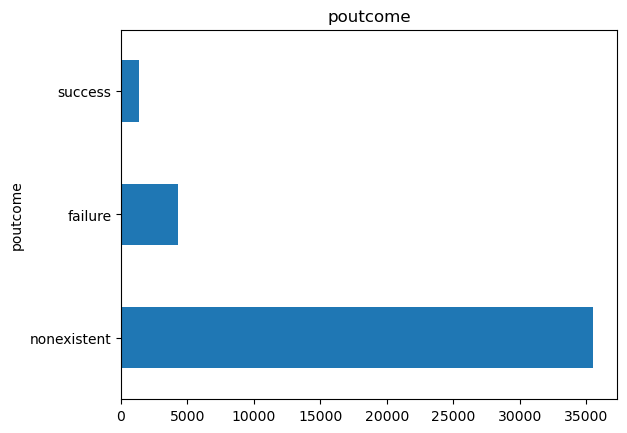


****************************************************************************************************
y
no     36538
yes     4639
Name: count, dtype: int64
--------------------------------------------------------------------------------
y
no     88.734002
yes    11.265998
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


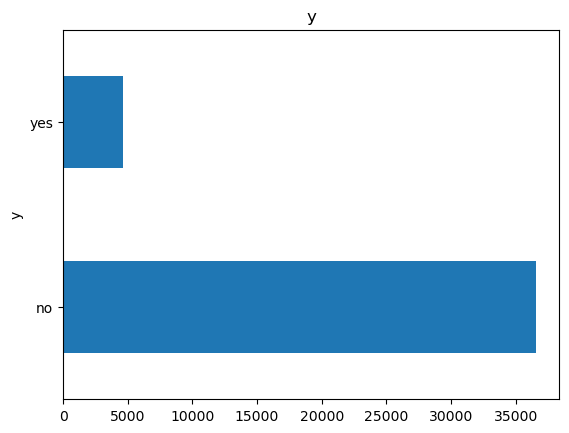


****************************************************************************************************


In [13]:
#Categorical Variables Analysis
for i in cat_var.columns:
  print(cat_var[i].value_counts())
  print('-'*80)
  print(cat_var[i].value_counts(normalize=True)*100)
  print('-'*80)
  print(cat_var[i].value_counts().plot(kind='barh'))
  plt.title(i)
  plt.show()
  print()
  print('*'*100)

- Data is imbalanced

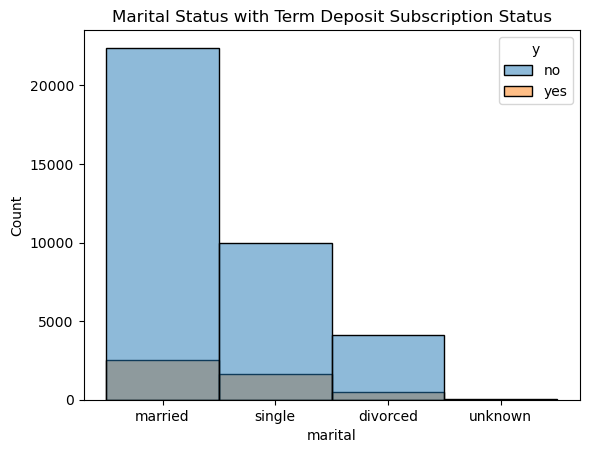

In [14]:
# fig=px.histogram(df,x=df['marital'],color=df['y'],barmode='group',title="Marital Status with Term Deposit Subscription Status")
# fig.show() ----> Plotly
sns.histplot(df,x=df['marital'],hue=df['y'])
plt.title('Marital Status with Term Deposit Subscription Status')
plt.show()

- The majority of people contacted in this campaign were married, followed by singles and divorced individuals.
- Across all marital statuses, the number of clients who did not subscribe (shown in blue) are significantly higher than those who did (shown in red).
- Married individuals have the highest count overall, but their subscription rate (red bar) is still low compared to non-subscribers. This indicates that while more married people were targeted, relatively few subscribed.
- Divorced individuals have the lowest counts among the marital categories, both in terms of total contacts and subscriptions.

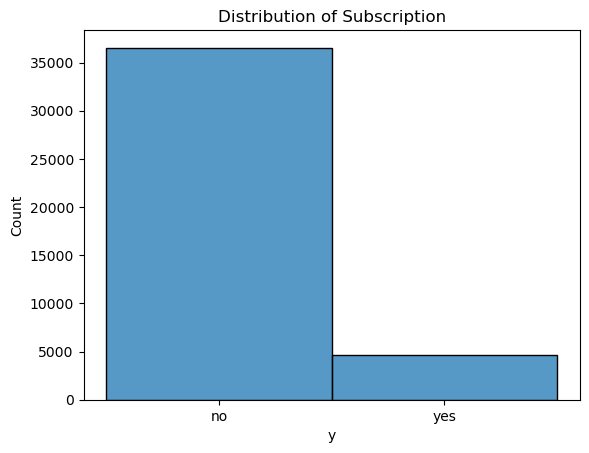

In [15]:
# px.histogram(df,x=df['y'],title="Distribution of Subscription") ----> Plotly
sns.histplot(df,x=df['y'])
plt.title('Distribution of Subscription')
plt.show()

- We can observe that **88.73%** of people have not subsribed to Term_Deposit and only **11.27%** of people have subscribed for the Term-Deposit which suggests that the data is **Imbalanced**.

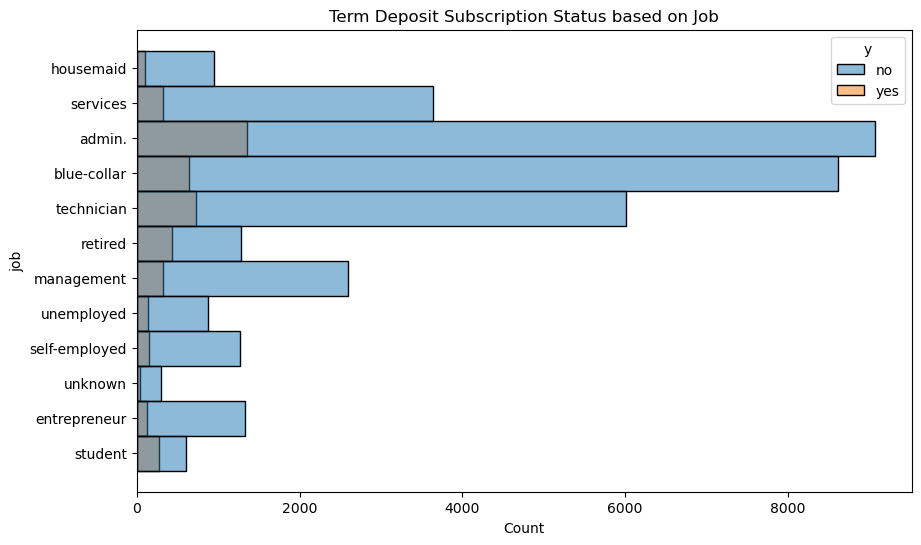

In [16]:
#px.histogram(df,y=df['job'],color=df['y'],title='Job with Term Deposit Subscription Status')---> Plotly
plt.figure(figsize=(10,6))
sns.histplot(df,y='job',hue='y')
plt.title('Term Deposit Subscription Status based on Job')
plt.show()

- Most customers have a job. The majority of customers are employed in the "admin." and "blue-collar" categories.
- People with `unknown` job are very less in terms of subscription and contact
- The highest percentage of customers with term deposit subscriptions are in the "admin." and "technician" categories.

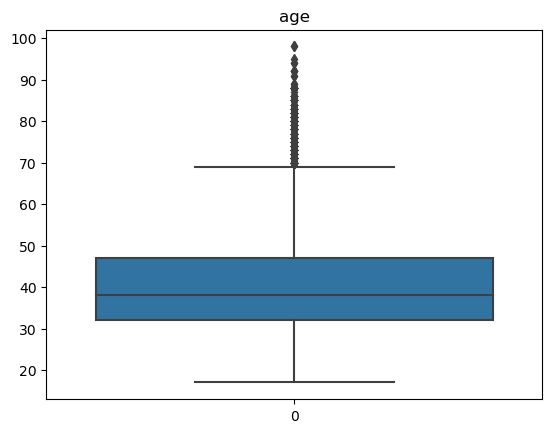

------------------------------------------------------------------------------------------------------------------------


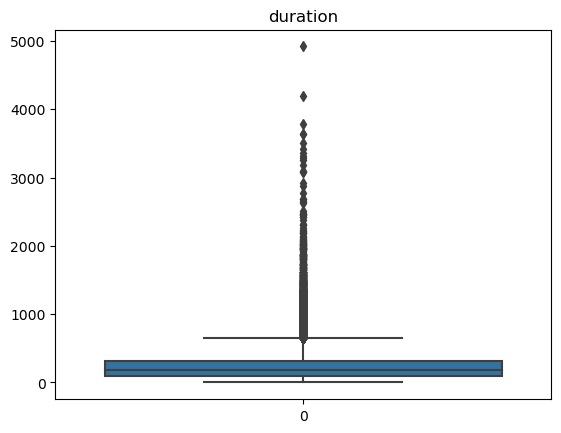

------------------------------------------------------------------------------------------------------------------------


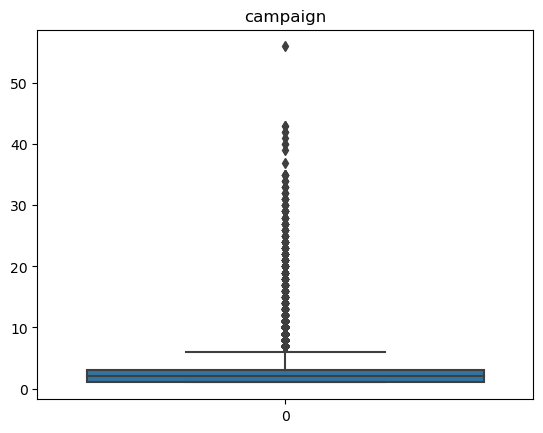

------------------------------------------------------------------------------------------------------------------------


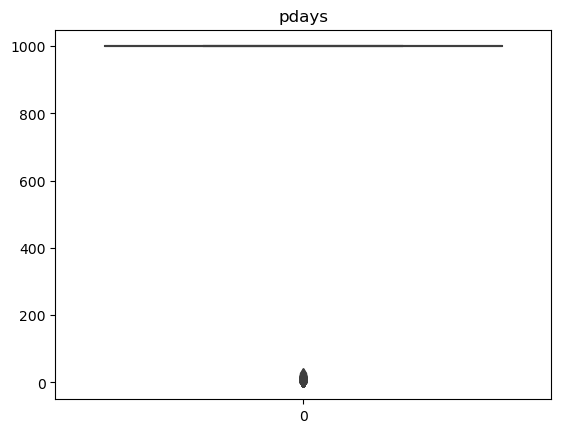

------------------------------------------------------------------------------------------------------------------------


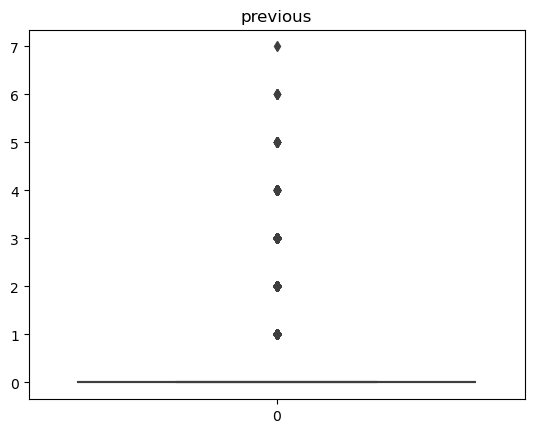

------------------------------------------------------------------------------------------------------------------------


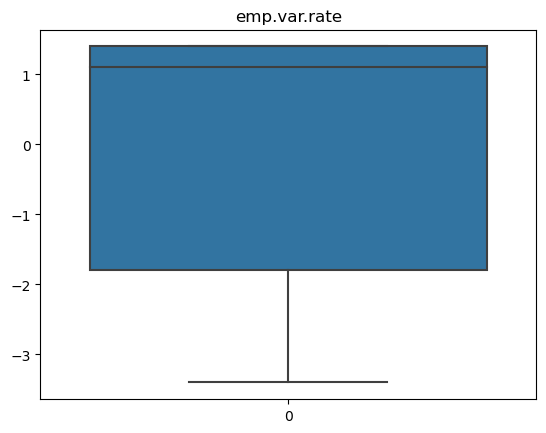

------------------------------------------------------------------------------------------------------------------------


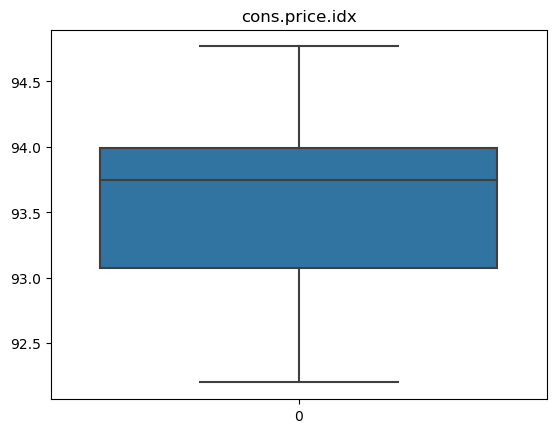

------------------------------------------------------------------------------------------------------------------------


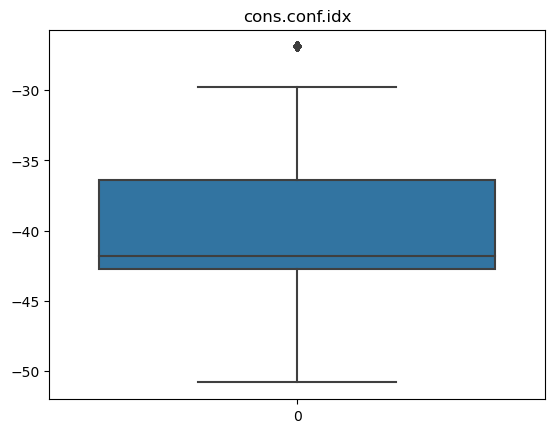

------------------------------------------------------------------------------------------------------------------------


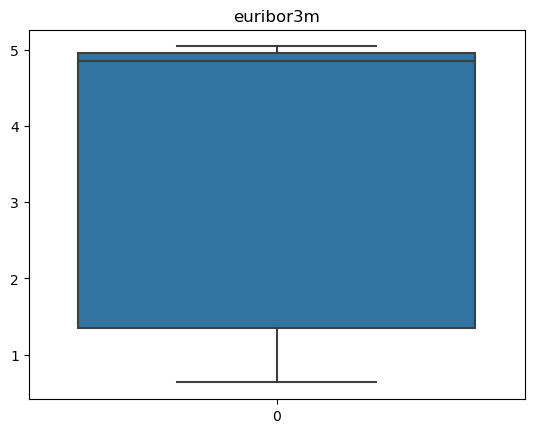

------------------------------------------------------------------------------------------------------------------------


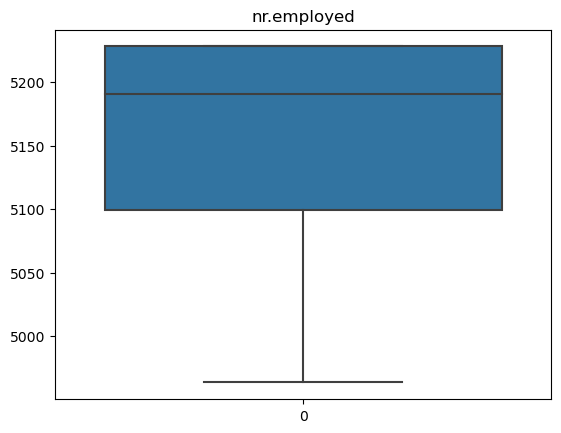

------------------------------------------------------------------------------------------------------------------------


In [17]:
#Outlier Analysis
for i in df.columns:
    if df[i].dtypes != 'object':
        fig=sns.boxplot(df[i])
        plt.title(i)
        plt.show()
        print('-'*120)

In [18]:
#Dropping Outliers
outliers=['age','duration','campaign','previous','cons.conf.idx']

for col in outliers:
    Q3=df[col].quantile(0.75)
    Q1=df[col].quantile(0.25)
    IQR=Q3-Q1
    LL=Q1 - 1.5* IQR #lower Limit
    UL=Q3 + 1.5* IQR #Uppper Limit
    df=df[(df[col] >= LL) & (df[col] <= UL)]

### Label Encoding:


In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

In [93]:
pickle.dump(le,open('encoder.pkl','wb'))

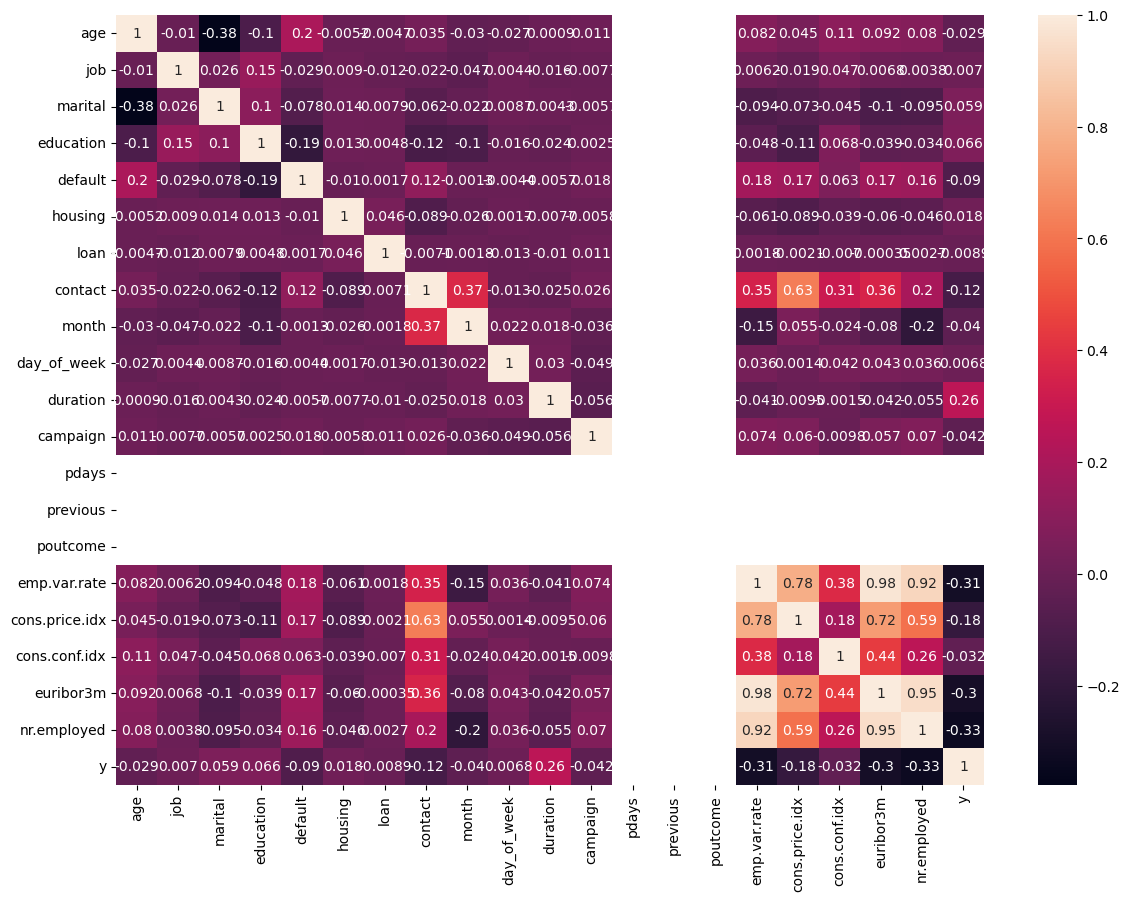

In [20]:
#Correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Feature Selection

In [21]:
x=df.iloc[:,0:20]
y=df.iloc[:,-1]

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

model_features=rf.fit(x,y)

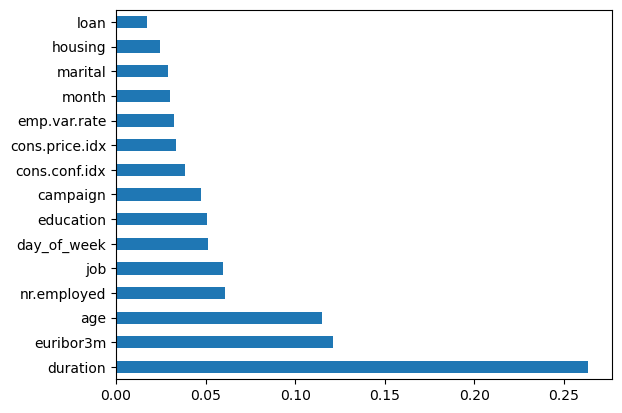

In [24]:
imp_features=pd.Series(model_features.feature_importances_,index=x.columns)
imp_features.nlargest(15).plot(kind='barh')
plt.show()

In [30]:
imp_features.nlargest(15)

duration          0.263798
euribor3m         0.121241
age               0.114782
nr.employed       0.060799
job               0.059622
day_of_week       0.051533
education         0.050696
campaign          0.047447
cons.conf.idx     0.038245
cons.price.idx    0.033686
emp.var.rate      0.032340
month             0.030285
marital           0.029068
housing           0.024670
loan              0.017211
dtype: float64

In [31]:
best_features=['duration', 'euribor3m', 'age','nr.employed','job','day_of_week','education','campaign','cons.price.idx','cons.conf.idx','emp.var.rate',
               'housing','month','loan','marital']

## Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [33]:
X=df[best_features]
y=df['y']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=6,stratify=y)

In [36]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (21244, 15)
Shape of x_test: (9105, 15)
Shape of y_train: (21244,)
Shape of y_test: (9105,)


In [37]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [38]:
y_train_arr=y_train.values
y_train_lr=y_train_arr.reshape((-1,1))

In [39]:
#Fitting the Logistic Regression Model
lr=LogisticRegression()
model_lr=lr.fit(x_train_std,y_train_lr)

In [40]:
#Predticting the values for x_test
y_pred_lr=model_lr.predict(x_test_std)

In [41]:
#Evaluation of Logistic Regression Model
acc=accuracy_score(y_test,y_pred_lr)*100
print('Accuracy of the Logistic Regression Model         :',acc)

ps=precision_score(y_test,y_pred_lr)
print('Precision Score of the Logistic Regression Model  :',ps)

rs=recall_score(y_test,y_pred_lr)
print('Recall Score of the Logistic Regression Model     :',rs)

cm=confusion_matrix(y_test,y_pred_lr)
print('Confusion Matrix of the Logistic Regression Model :\n',cm)

Accuracy of the Logistic Regression Model         : 94.75013728720482
Precision Score of the Logistic Regression Model  : 0.5409090909090909
Recall Score of the Logistic Regression Model     : 0.2399193548387097
Confusion Matrix of the Logistic Regression Model :
 [[8508  101]
 [ 377  119]]


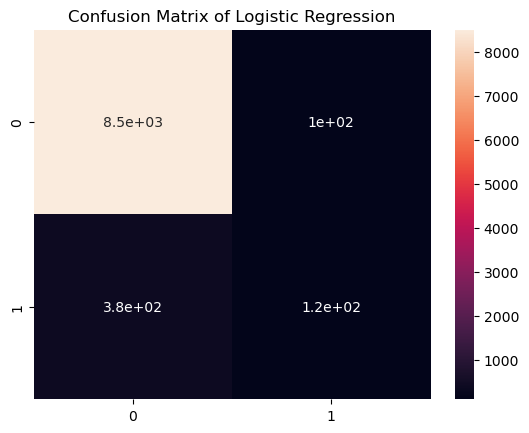

In [42]:
#Visualisation of Confusion Matrix
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=6)

In [62]:
dt=DecisionTreeClassifier()

model_dt=dt.fit(x_train,y_train)

In [63]:
y_pred_dt=model_dt.predict(x_test)

In [64]:
#Evaluation of Decision Tree Model
acc_dt=accuracy_score(y_test,y_pred_dt)*100
print('Precision Score of the Decision Tree Model  :',acc_dt)

ps_dt=precision_score(y_test,y_pred_dt)
print('Precision Score of the Decision Tree Model  :',ps_dt)

rs_dt=recall_score(y_test,y_pred_dt)
print('Recall Score of the Decision Tree Model     :',rs_dt)

cm_dt=confusion_matrix(y_test,y_pred_dt)
print('Confusion Matrix of the Decision Tree Model :\n',cm_dt)

Precision Score of the Decision Tree Model  : 93.35529928610653
Precision Score of the Decision Tree Model  : 0.40458015267175573
Recall Score of the Decision Tree Model     : 0.4198019801980198
Confusion Matrix of the Decision Tree Model :
 [[8288  312]
 [ 293  212]]


### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

model_xgb=xgb.fit(x_train,y_train)

In [ ]:
y_pred_xgb=model_xgb.predict(x_test)

In [ ]:
#Evaluation of XGBoost Model
acc_xgb=accuracy_score(y_test,y_pred_xgb)*100
print('Precision Score of the XGBoost Model  :',acc_xgb)

ps_xgb=precision_score(y_test,y_pred_xgb)
print('Precision Score of the XGBoost Model  :',ps_xgb)

rs_xgb=recall_score(y_test,y_pred_xgb)
print('Recall Score of the XGBoost Model     :',rs_xgb)

cm_xgb=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix of the XGBoost Model :\n',cm_xgb)

Precision Score of the XGBoost Model  : 95.15650741350906
Precision Score of the XGBoost Model  : 0.6025641025641025
Recall Score of the XGBoost Model     : 0.3722772277227723
Confusion Matrix of the XGBoost Model :
 [[8476  124]
 [ 317  188]]


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8600
           1       0.60      0.37      0.46       505

    accuracy                           0.95      9105
   macro avg       0.78      0.68      0.72      9105
weighted avg       0.94      0.95      0.95      9105



### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

model_rf=rf.fit(x_train,y_train)

In [66]:
y_pred_rf=model_rf.predict(x_test)

In [67]:
#Evaluation OfRandom Forest Model
acc_rf=accuracy_score(y_test,y_pred_rf)*100
print('Precision Score of the Random Forest Model  :',acc_rf)

ps_rf=precision_score(y_test,y_pred_rf)
print('Precision Score of the Random Forest Model  :',ps_rf)

rs_rf=recall_score(y_test,y_pred_rf)
print('Recall Score of the Random Forest Model     :',rs_rf)

cm_rf=confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix of the Random Forest Model :\n',cm_rf)

Precision Score of the Random Forest Model  : 95.28830313014826
Precision Score of the Random Forest Model  : 0.6450381679389313
Recall Score of the Random Forest Model     : 0.3346534653465347
Confusion Matrix of the Random Forest Model :
 [[8507   93]
 [ 336  169]]


In [68]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8600
           1       0.65      0.33      0.44       505

    accuracy                           0.95      9105
   macro avg       0.80      0.66      0.71      9105
weighted avg       0.94      0.95      0.95      9105



In [78]:
##Hyperparameter Tuning random forest
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,200,300],
            'max_depth':[10,20,30],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}

In [79]:
rf=RandomForestClassifier()

In [84]:
hyp_param_rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)

In [85]:
hyp_param_rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [87]:
y_pred_rf_hp=hyp_param_rf.predict(x_test)

In [88]:
#Evaluation Of Tuned Random Forest Model
acc_rf=accuracy_score(y_test,y_pred_rf_hp)*100
print('Precision Score of the Random Forest Model  :',acc_rf)

ps_rf=precision_score(y_test,y_pred_rf_hp)
print('Precision Score of the Random Forest Model  :',ps_rf)

rs_rf=recall_score(y_test,y_pred_rf_hp)
print('Recall Score of the Random Forest Model     :',rs_rf)

cm_rf=confusion_matrix(y_test,y_pred_rf_hp)
print('Confusion Matrix of the Random Forest Model :\n',cm_rf)

Precision Score of the Random Forest Model  : 95.18945634266886
Precision Score of the Random Forest Model  : 0.6871508379888268
Recall Score of the Random Forest Model     : 0.24356435643564356
Confusion Matrix of the Random Forest Model :
 [[8544   56]
 [ 382  123]]


## Pickling The Model file For Deployment

In [91]:
pickle.dump(hyp_param_rf,open('bank_term_deposit.pkl','wb'))

## Conclusion
The **Random Forest** with **Hyper Parameter Tuning** has demonstrated **exceptional performance** in predicting customer subscription to a term deposit. Its **high precision**, **recall**, and overall **accuracy** make it a reliable tool for the bank to identify potential customers and optimize marketing strategies.

- Recommendations for the Bank:

Targeted Marketing: Utilize the model to identify customers who are highly likely to subscribe to a term deposit.
Personalized Offers: Tailor marketing campaigns and offers to individual customer preferences and needs.
Customer Relationship Management: Prioritize building strong relationships with customers identified as high-potential subscribers.
Continuous Monitoring: Regularly monitor the model's performance and retrain it as needed to ensure its accuracy and relevance.
By leveraging the insights from this model, the bank can make informed decisions, improve customer satisfaction, and ultimately increase its revenue.
- `PROJECT BY` -**SHAIK MOHAMMAD SAMEER HUSSAIN**